In [1]:
#This jupyter notebook is prepared by Jason Saini

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from scipy import stats
import missingno as msno

In [3]:
#import the data to a dataframe and show how many rows and columns it has
df = pd.read_csv('hrdata.csv')
print("Number of rows = " + str(df.shape[0]))
print("Number of columns = " + str(df.shape[1]))


Number of rows = 21287
Number of columns = 18


In [4]:
#call the describe method of dataframe to see some summary statistics of the numerical columns
df.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


In [5]:
df.dtypes

Unnamed: 0                    int64
rec_num                       int64
enrollee_id                   int64
city                         object
city_development_index      float64
gender                       object
relevent_experience          object
enrolled_university          object
education_level              object
major_discipline             object
experience                   object
company_size                 object
company_type                 object
last_new_job                 object
training_hours                int64
target                      float64
state                        object
city_development_matrics    float64
dtype: object

Interesting and good to know statistics:
 - All counts besides target (19158) are exactly the same (21287)
 - Max value == count for rec_num
 - city_development_matrics == city_development_index * 10

In [6]:
# show top 5 rows of dataframe
df.head()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [7]:
# Show last 5 rows of dataframe
df.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


In [8]:
# list all numerical columns
numerical_features = df.select_dtypes(include = np.number)
numerical_features.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

In [9]:
#list all categorical columns
categorical_features = df.select_dtypes(exclude = np.number)
categorical_features.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

## Examine Missing Values

In [10]:
#Show a list with column wise count of missing values and display the list in count wise descending order
df.isnull().sum().sort_values(ascending = False)

company_type                6774
company_size                6560
gender                      5016
major_discipline            3125
target                      2129
education_level              512
last_new_job                 463
enrolled_university          417
experience                    70
state                          0
training_hours                 0
Unnamed: 0                     0
rec_num                        0
relevent_experience            0
city_development_index         0
city                           0
enrollee_id                    0
city_development_matrics       0
dtype: int64

In [11]:
# Show a list with column wise percentage of missing values and display the list in percentage wise descending order'
df.isna().sum().sort_values(ascending = False) * 100 / len(df)

company_type                31.822239
company_size                30.816931
gender                      23.563677
major_discipline            14.680321
target                      10.001409
education_level              2.405224
last_new_job                 2.175036
enrolled_university          1.958942
experience                   0.328839
state                        0.000000
training_hours               0.000000
Unnamed: 0                   0.000000
rec_num                      0.000000
relevent_experience          0.000000
city_development_index       0.000000
city                         0.000000
enrollee_id                  0.000000
city_development_matrics     0.000000
dtype: float64

<AxesSubplot:xlabel='Column', ylabel='Number of missing values'>

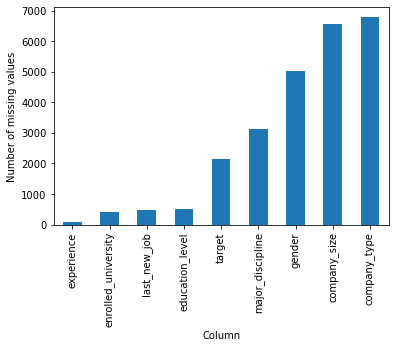

In [12]:
# Display a bar plot to visualize only the columns with missing values and their count
null_df = df.isnull().sum()
null_df = null_df[null_df > 0]
null_df.sort_values(inplace = True)
plt.xlabel("Column")
plt.ylabel("Number of missing values")
null_df.plot.bar()


<AxesSubplot:>

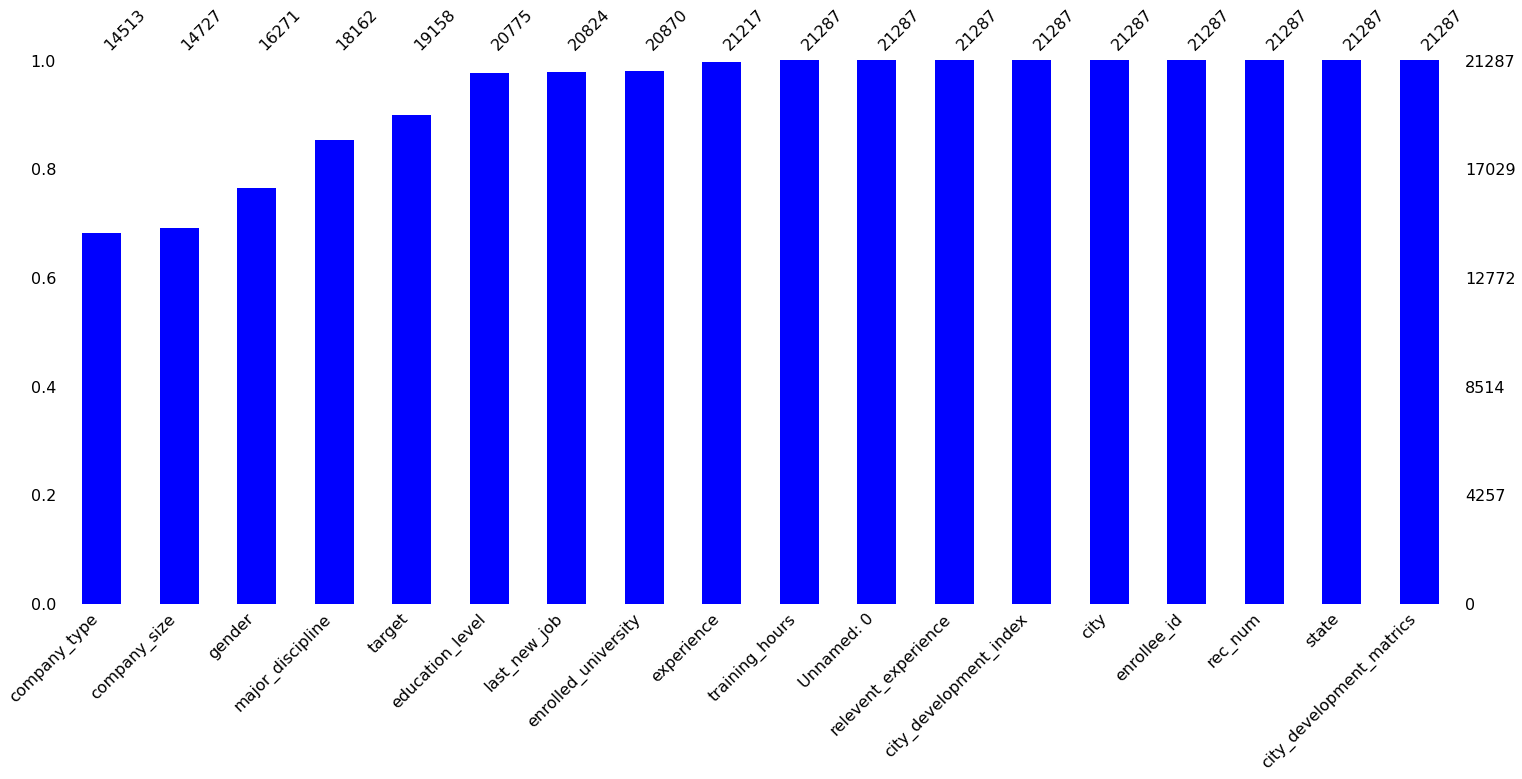

In [13]:
#Use missingno’s bar plot
msno.bar(df, color = 'blue', sort = "ascending" )

<AxesSubplot:>

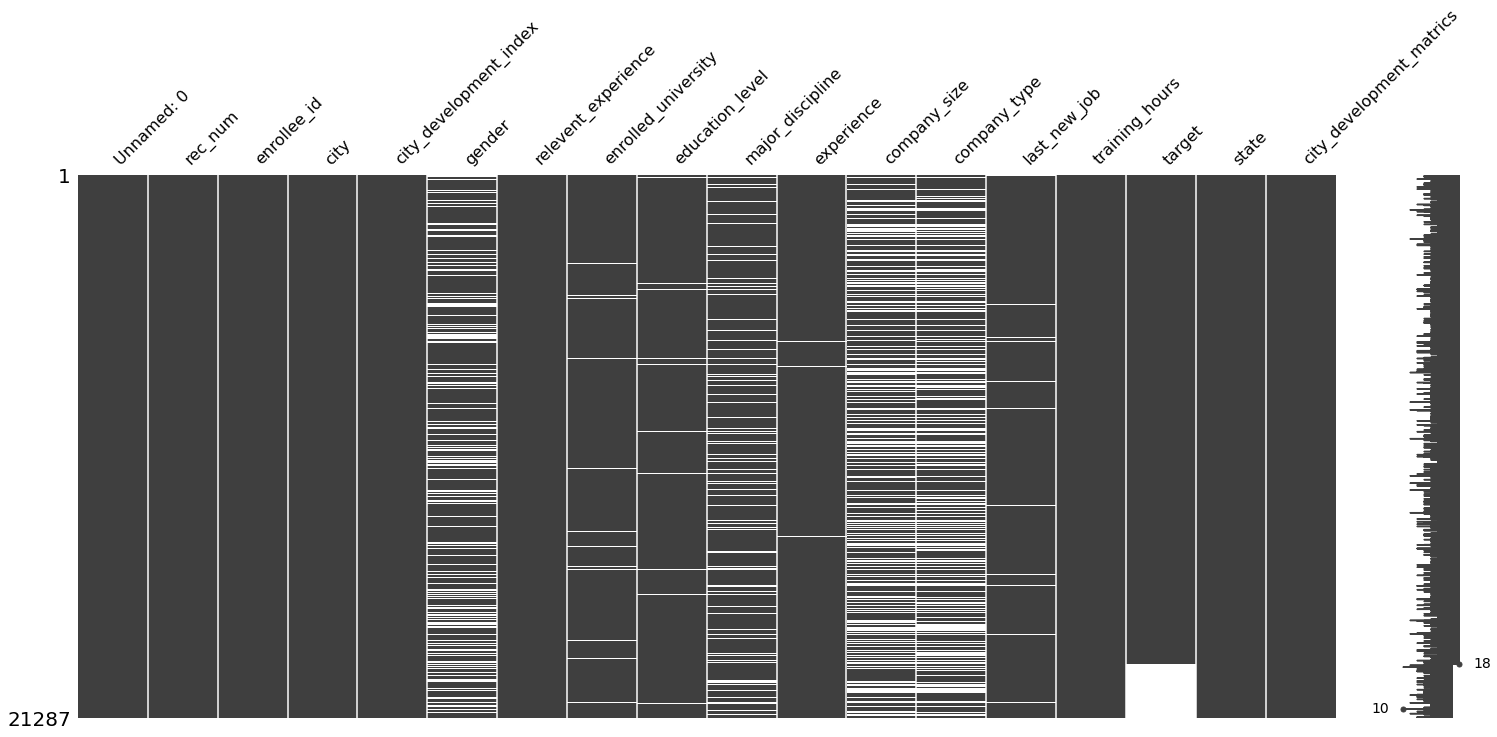

In [14]:
#Use missingno’s matrix plot w/ 200 sample
msno.matrix(df)

<AxesSubplot:>

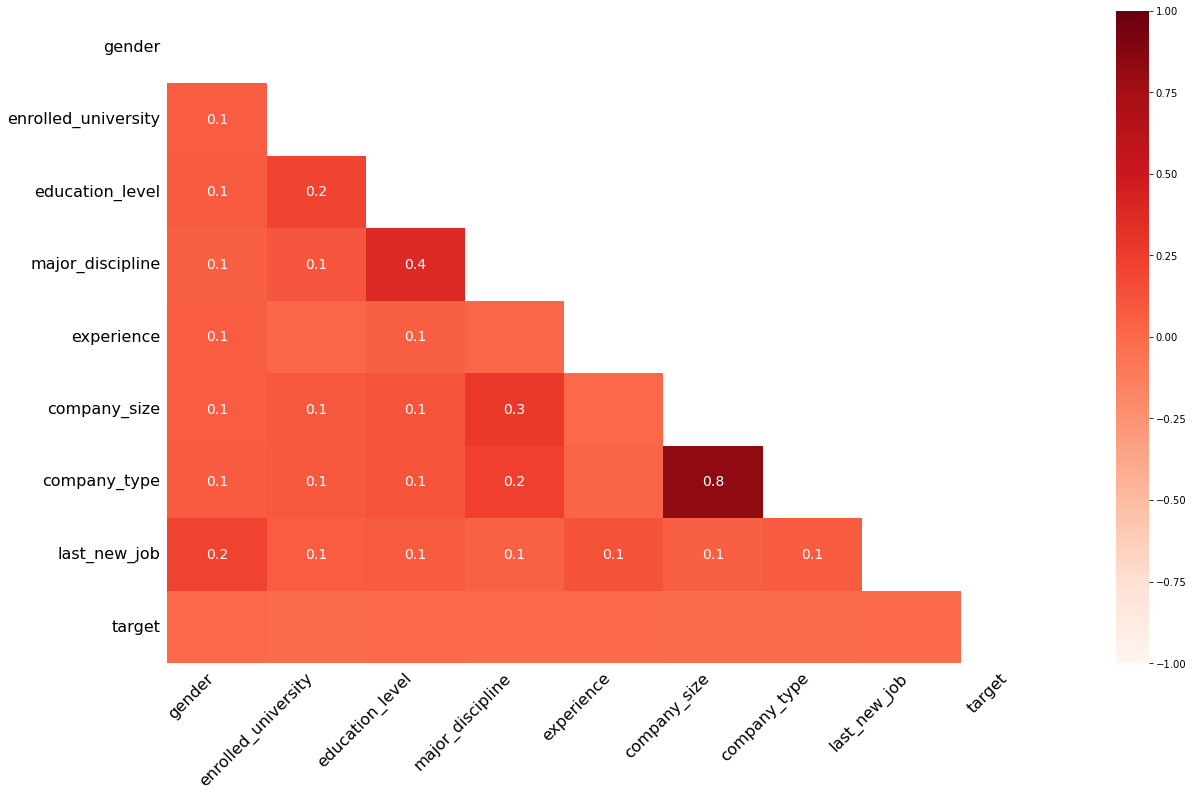

In [15]:
# Use missingno's heatmap
msno.heatmap(df, cmap = "Reds")

### Interpret any interesting information you found in the heatmap and any one plot:
- matrix plot shows us that company_size & company_type are the two columns with highest missing values
- heatmap shows us that there is a strong positive correlation between company size and company type (might need to find a way to substitute missing values for higher accuracy before engineering a new feature)

## Understanding Categorical attributes

In [16]:
categorical_columns = df.select_dtypes(exclude = np.number)

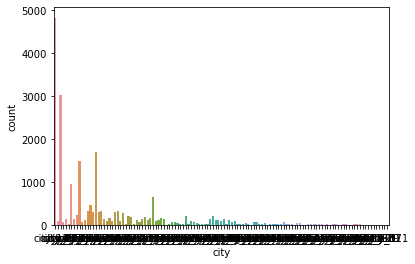

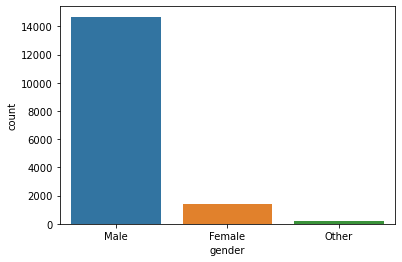

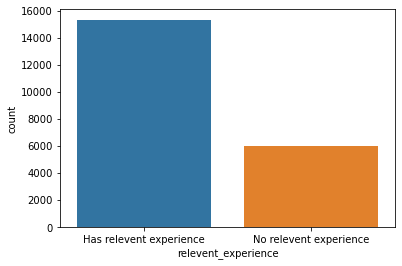

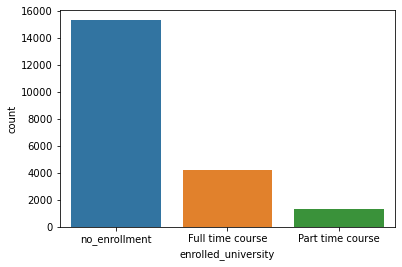

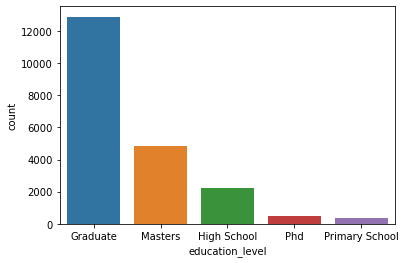

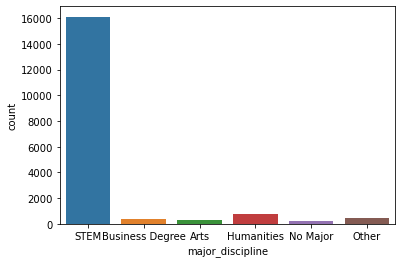

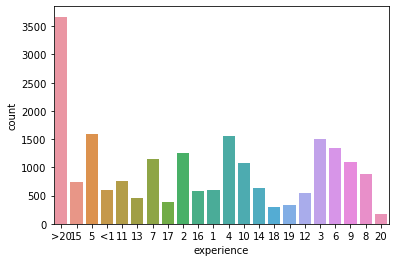

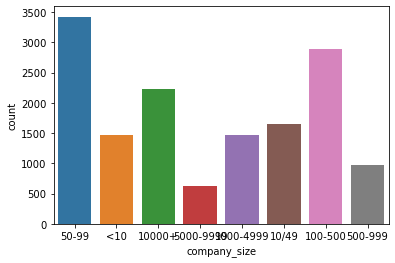

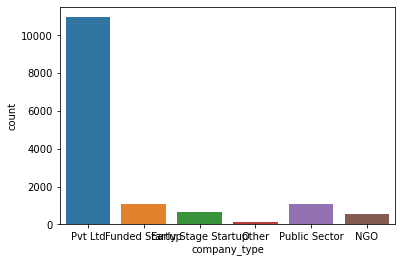

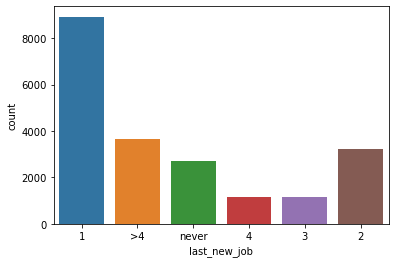

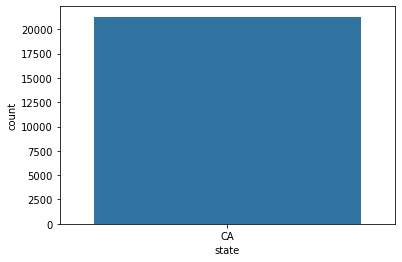

In [18]:
    #Use seaborn bar plot for the categorical feature to see different values and count
    for cat in categorical_columns:
        sns.countplot(x = cat, data = df)
        plt.show()

### Note: countplot is a type of barplot that shows counts of each category, and its implementation is much cleaner

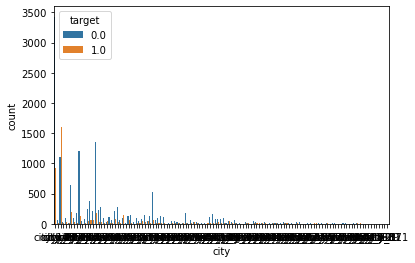

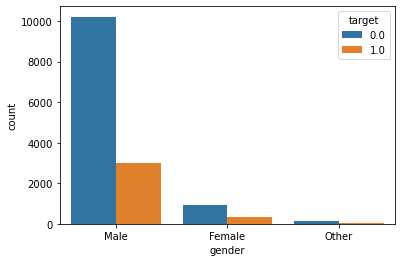

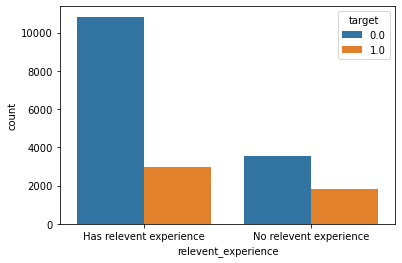

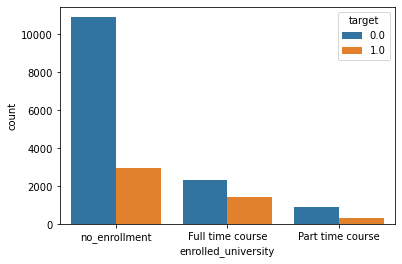

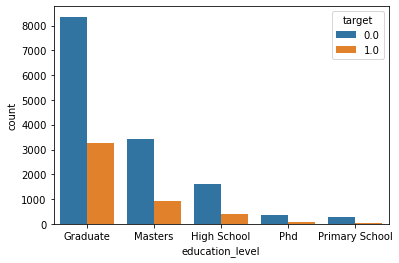

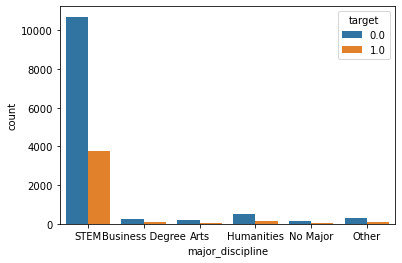

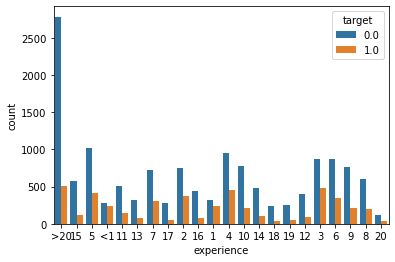

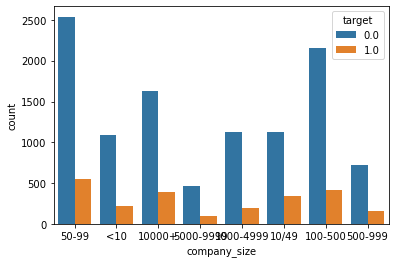

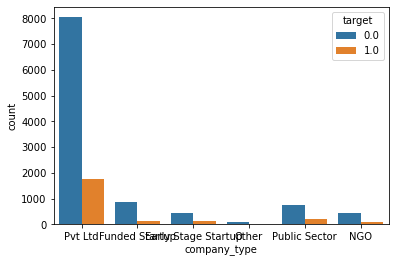

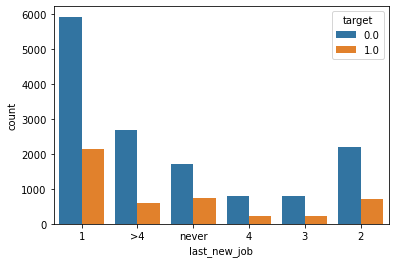

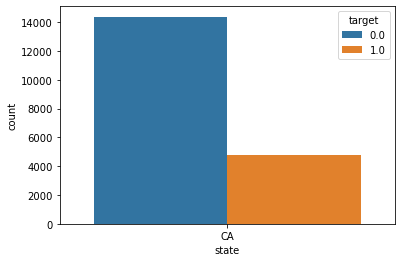

In [17]:
    #Use seaborn countplot for the categorical feature against the values of the target
    for cat in categorical_columns:
        sns.countplot(x = cat, hue = df["target"],data = df)
        plt.show()

Interpret any interesting information and any information that might help you to make any decision on combining, removing, or adding features based on that, or any resampling maybe needed.

- We clearly need to resample for states as there is only one (CA)
- A lot of data is skewed to the left so we there might be a bias
- Might need to resample majors as there is a clear bias towards STEM

## Understanding Numerical Attributes

<AxesSubplot:ylabel='Frequency'>

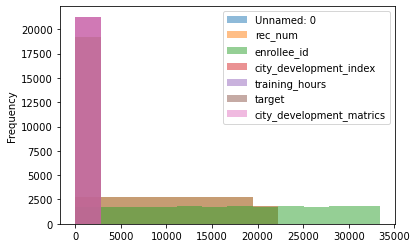

In [19]:
#Plot their distributions using histogram  
numerical_features.plot.hist(bins = 12,alpha = .5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

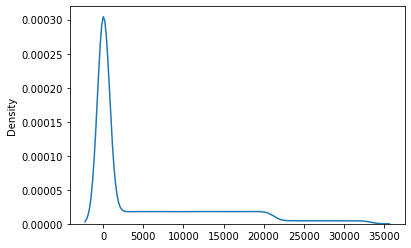

In [20]:
#Plot the distribution using seaborn distplot
sns.distplot(numerical_features, hist = False)

## Interpret any interesting information:
- training_hours and city_development_index have much higher frequencies than the rest of the features

# Correlation

<AxesSubplot:>

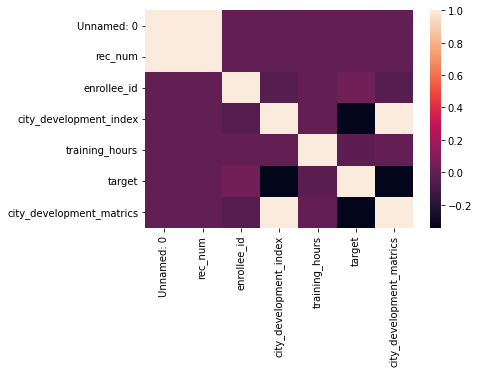

In [21]:
#For the numerical attributes, use heatmap to show the correlation
sns.heatmap(numerical_features.corr())

<AxesSubplot:>

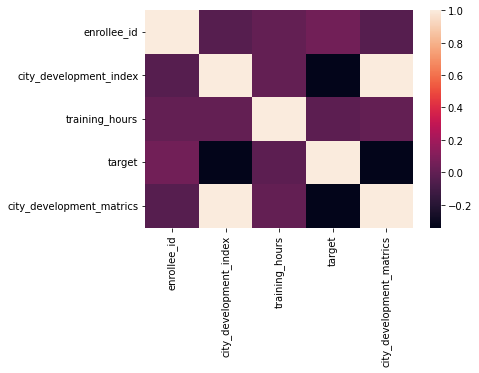

In [30]:
# Heatmap with shortlisted columns
sns.heatmap(numerical_features.drop(labels = ["Unnamed: 0","rec_num"], axis = 1).corr())

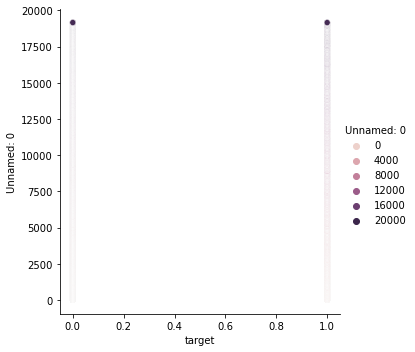

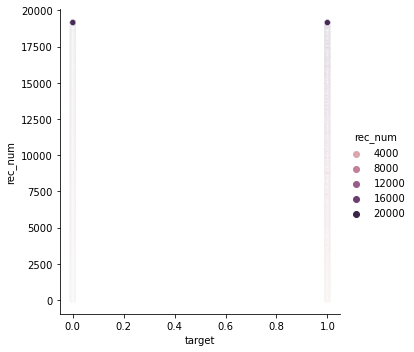

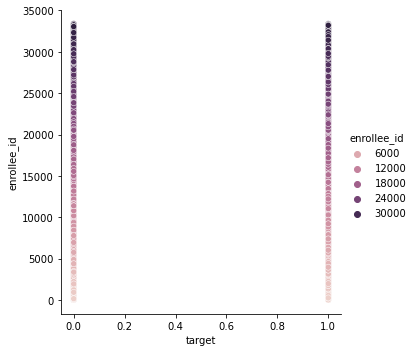

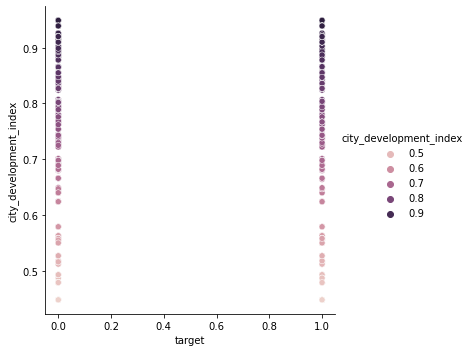

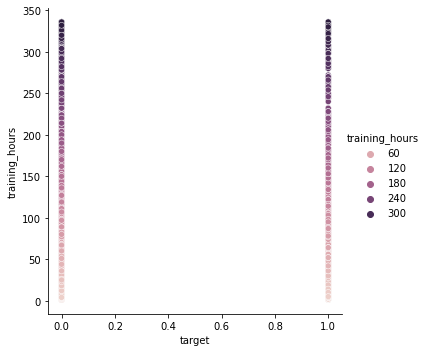

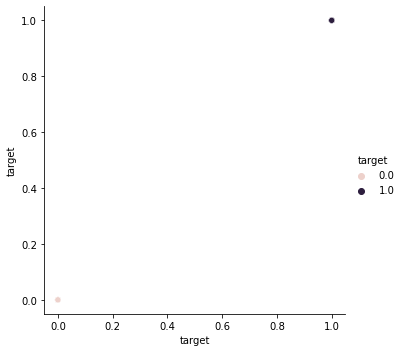

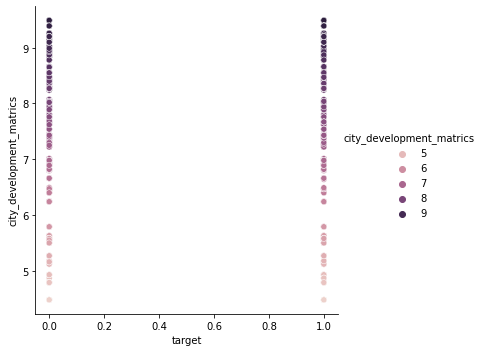

In [23]:
#Show scatter plots between columns to show the relationships with the target
for numerical_col in numerical_features:
    sns.relplot(data = numerical_features, y = numerical_col, x = "target", hue = numerical_col)
    plt.show()

### Interpret and explain any finding and next course of action:
- We should re-evaluate the range for our target it is hard to distinguish when there is only 0 and 1
- We can remove rec_num feature as it has no correlation with our target value

## Outliers

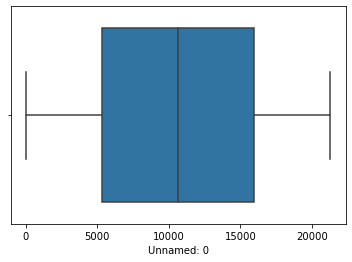

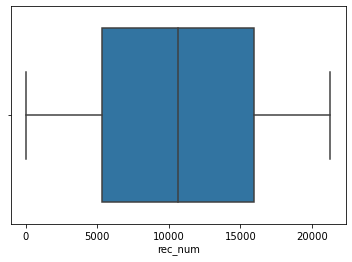

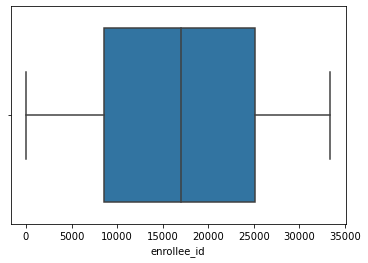

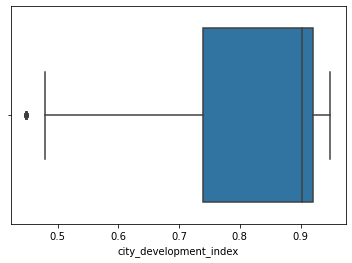

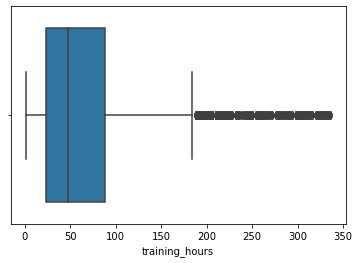

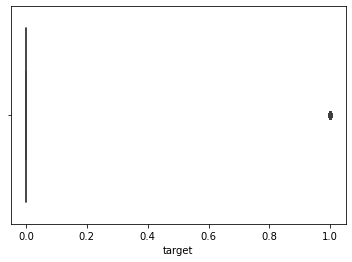

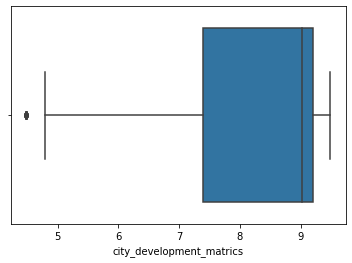

In [24]:
#Use boxplot or any other strategies to find outliers
for numerical_col in numerical_features:
    sns.boxplot(data = numerical_features,x = numerical_col)
    plt.show()

<AxesSubplot:>

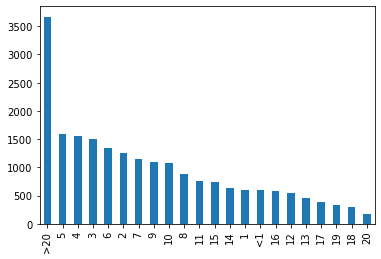

In [26]:
categorical_features["experience"].value_counts().plot(kind='bar')

What are the different values of experience, can you categorize them in to 0, 1, and 2?
- There are too many different values of experience to categorize in to 0,1 and 2 unless we utilize data ranges.

Summary and discussion:
Finally after all the above EDA, summarize your finding, next course of action such as we may need to transform distribution because of right skew etc, need to remove a particular columns for any reasons, remove records for any reasons, need to rebalance data and what are the rebalancing options (if needed), and any other finding.

- One part of our feature engineering should be to combine city_development_metrics and city_development_index (or we can remove one of them for simplicity)
- We should resample company_size & company_type as there are a lot of missing values
- Company_size & company_type can possible be engineered into a single feature( or one can be droppped) but we cannot be sure until we resample the missing values (or fill them in with mean,median, etc).
- We need to resample states because our data is biased to CA (we only have data from one state)
- We might also have to resample our data for majors as there is a clear skew to STEM majors which may result in bias
- We should re-evaluate the range for our target it is hard to distinguish when there is only 0 and 1
- We can remove rec_num feature as it has no correlation with our target value